In [10]:
import pandas as pd
import numpy as np
import pickle 
import time
import matplotlib.pyplot as plt

In [3]:
file_name = "noise_complaints.pickle"
complaints = pickle.load(open(file_name, "rb"))
# keys = ['Total', 'People', 'Traffic', 'region_areas', 'region_densities', 'region_names']

In [6]:
densities = complaints['region_densities'][:]
areas = complaints['region_areas'][:]
names = complaints['region_names'][:]

total_complaints = complaints['Total']['Region'][:]
people_complaints = complaints['People']['Region'][:]
traffic_complaints = complaints['Traffic']['Region'][:]

total_complaint_densities = np.zeros(59)
people_complaint_densities = np.zeros(59)
traffic_complaint_densities = np.zeros(59)


for r in range(len(names)):
    tot_inds = np.where(total_complaints == names[r])[0]
    total_complaint_densities[r] = len(tot_inds)/areas[r]
    
    people_inds = np.where(people_complaints == names[r])[0]
    people_complaint_densities[r] = len(people_inds)/areas[r]
    
    traffic_inds = np.where(traffic_complaints == names[r])[0]
    traffic_complaint_densities[r] = len(traffic_inds)/areas[r]


Text(0, 0.5, 'Complaint density')

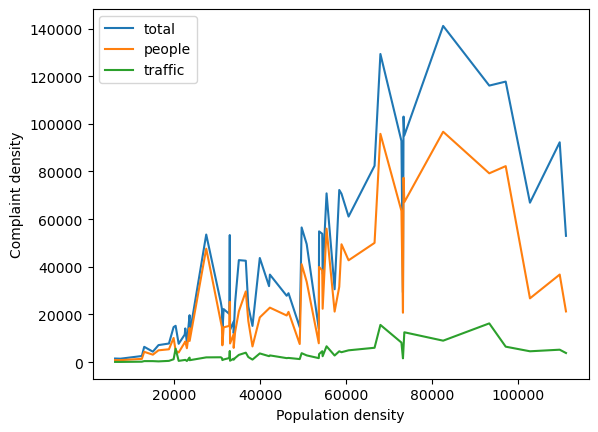

In [14]:
asc_densities = np.argsort(densities)

plt.plot(densities[asc_densities], total_complaint_densities[asc_densities], label='total')
plt.plot(densities[asc_densities], people_complaint_densities[asc_densities], label='people')
plt.plot(densities[asc_densities], traffic_complaint_densities[asc_densities], label='traffic')
plt.legend()
plt.xlabel('Population density')
plt.ylabel('Complaint density')
